In [146]:
import os
import numpy as np
import matplotlib.pyplot as plt
from renishawWiRE import WDFReader
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [147]:
# Указываем путь к файлам
folder_path = "D:/Универ/очистка сенсоров"
os.chdir(folder_path)

In [148]:
os.listdir()

['after 001H2O2.wdf',
 'after 01H2O2.wdf',
 'after 1H2O2.wdf',
 'after 2H2O2 GOx.wdf',
 'after 2H2O2.wdf',
 'after 3H2O2 GOx.wdf',
 'after 3H2O2.wdf',
 'after 4H2O2 GOx.wdf',
 'after 4H2O2.wdf',
 'after C2H5OH.wdf',
 'after H2O.wdf',
 'before 001H2O2.wdf',
 'before 01H2O2.wdf',
 'before 1H2O2.wdf',
 'before 2H2O2.wdf',
 'before 3H2O2.wdf',
 'before 4H2O2.wdf',
 'результаты_очистки.xlsx']

In [149]:

# Корректные имена файлов на основе вашего сообщения об ошибках
files_corrected = {
    "before_001H2O2": "before 001H2O2.wdf",
    "before_01H2O2": "before 01H2O2.wdf",
    "before_1H2O2": "before 1H2O2.wdf",  # Убрали пробел перед .wdf
    "before_2H2O2": "before 2H2O2.wdf",
    "before_3H2O2": "before 3H2O2.wdf",  # Убрали лишнее .wdf
    "after_001H2O2": "after 001H2O2.wdf",
    "after_01H2O2": "after 01H2O2.wdf",
    "after_1H2O2": "after 1H2O2.wdf",
    "after_2H2O2": "after 2H2O2.wdf",    # Убрали лишнее .wdf
    "after_3H2O2": "after 3H2O2.wdf",
}

def read_hyperspectral(file_path):
    try:
        reader = WDFReader(file_path)
        spectra = reader.spectra
        wn = reader.xdata
        return wn, spectra.reshape(30, 30, -1)
    except Exception as e:
        print(f"Ошибка при чтении {file_path}: {str(e)}")
        return None, None

# Проверка существования файлов перед загрузкой
print("Проверка файлов:")
for key, filename in files_corrected.items():
    path = os.path.join(folder_path, filename)
    print(f"{filename}: {'существует' if os.path.exists(path) else 'ОТСУТСТВУЕТ'}")

# Загрузка только существующих файлов
data = {}
for conc in ['001', '01', '1', '2', '3']:
    before_file = files_corrected[f"before_{conc}H2O2"]
    after_file = files_corrected[f"after_{conc}H2O2"]
    
    before_path = os.path.join(folder_path, before_file)
    after_path = os.path.join(folder_path, after_file)
    
    if os.path.exists(before_path) and os.path.exists(after_path):
        wn, before = read_hyperspectral(before_path)
        _, after = read_hyperspectral(after_path)
        
        if wn is not None and before is not None and after is not None:
            data[conc] = {'wn': wn, 'before': before, 'after': after}
    else:
        print(f"Пропущена концентрация {conc}% - отсутствуют файлы")

Проверка файлов:
before 001H2O2.wdf: существует
before 01H2O2.wdf: существует
before 1H2O2.wdf: существует
before 2H2O2.wdf: существует
before 3H2O2.wdf: существует
after 001H2O2.wdf: существует
after 01H2O2.wdf: существует
after 1H2O2.wdf: существует
after 2H2O2.wdf: существует
after 3H2O2.wdf: существует


In [150]:
for conc, d in data.items():
    print(f"\nКонцентрация {conc}% H2O2:")
    print(f"Волновые числа: {d['wn'].shape}")
    print(f"До обработки: {d['before'].shape}")
    print(f"После обработки: {d['after'].shape}")
    
    # Проверка согласованности данных
    if d['before'].shape != d['after'].shape:
        print("Внимание! Размерности before и after не совпадают!")


Концентрация 001% H2O2:
Волновые числа: (1011,)
До обработки: (30, 30, 1011)
После обработки: (30, 30, 1011)

Концентрация 01% H2O2:
Волновые числа: (1011,)
До обработки: (30, 30, 1011)
После обработки: (30, 30, 1011)

Концентрация 1% H2O2:
Волновые числа: (1011,)
До обработки: (30, 30, 1011)
После обработки: (30, 30, 1011)

Концентрация 2% H2O2:
Волновые числа: (1011,)
До обработки: (30, 30, 1011)
После обработки: (30, 30, 1011)

Концентрация 3% H2O2:
Волновые числа: (1011,)
До обработки: (30, 30, 1011)
После обработки: (30, 30, 1011)


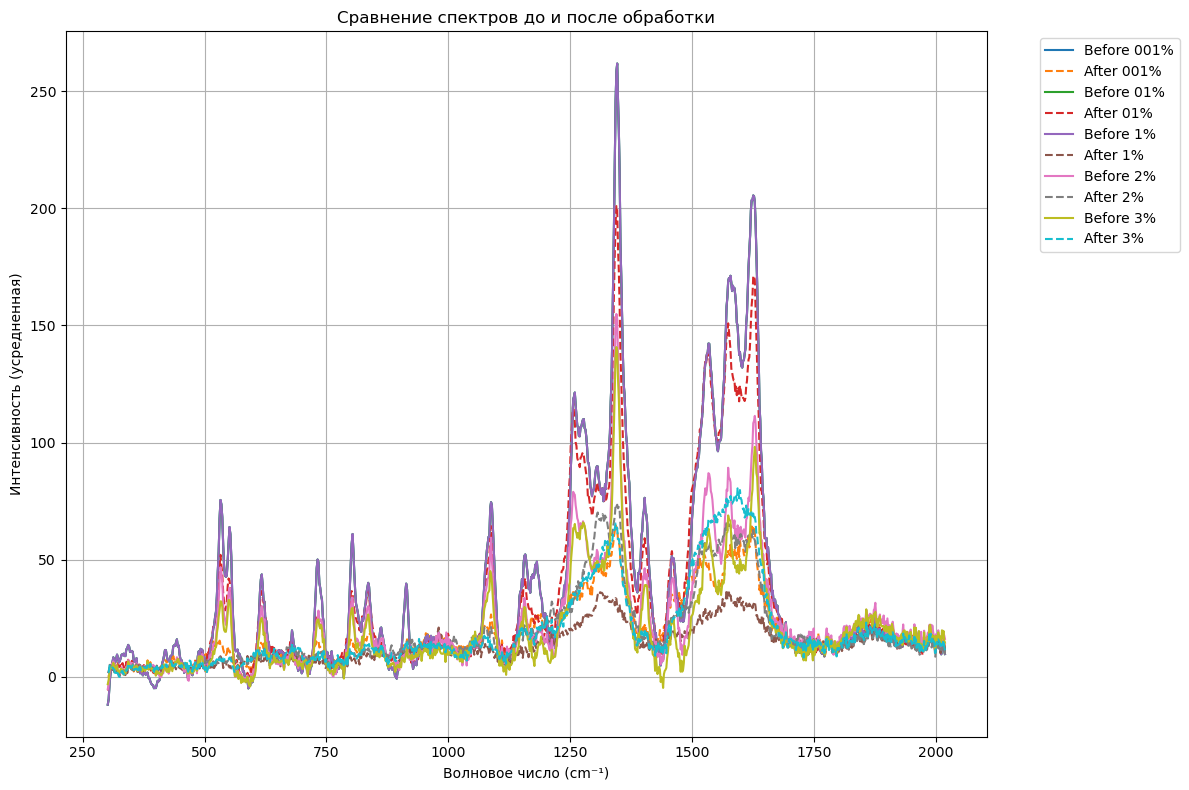

In [141]:
plt.figure(figsize=(12, 8))
for conc, d in data.items():
    # Усреднение по всем пикселям карты
    mean_before = np.mean(d['before'], axis=(0,1))
    mean_after = np.mean(d['after'], axis=(0,1))
    
    plt.plot(d['wn'], mean_before, label=f'Before {conc}%')
    plt.plot(d['wn'], mean_after, '--', label=f'After {conc}%')

plt.xlabel('Волновое число (cm⁻¹)')
plt.ylabel('Интенсивность (усредненная)')
plt.title('Сравнение спектров до и после обработки')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [151]:
# Правильное обращение к данным
conc = '3'  # Для 3% концентрации
if conc in data:
    before = data[conc]['before']
    after = data[conc]['after']
    
    # Проверка средних значений
    print(f"Средняя интенсивность (3%): before={np.mean(before):.2f}, after={np.mean(after):.2f}")

Средняя интенсивность (3%): before=19.91, after=19.88


In [152]:
def analyze_concentration(conc, data):
    if conc not in data:
        print(f"Данные для {conc}% отсутствуют")
        return
    
    d = data[conc]
    before = d['before']
    after = d['after']
    wn = d['wn']
    
    # 1. Расчет эффективности
    before_sum = np.sum(before, axis=2)
    after_sum = np.sum(after, axis=2)
    efficiency = 100 * (1 - after_sum / before_sum)
    
    # 2. Статистика
    print(f"\nАнализ для {conc}% H2O2:")
    print(f"Средняя эффективность: {np.nanmean(efficiency):.1f}%")
    print(f"Медианная эффективность: {np.nanmedian(efficiency):.1f}%")
    print(f"Минимальная эффективность: {np.nanmin(efficiency):.1f}%")
    print(f"Максимальная эффективность: {np.nanmax(efficiency):.1f}%")
    
    # 3. Проблемные пиксели (где интенсивность увеличилась)
    problem_pixels = np.sum(after_sum > before_sum)
    print(f"Проблемных пикселей (увеличение интенсивности): {problem_pixels}/{before_sum.size}")

# Анализ всех концентраций
for conc in ['001', '01', '1', '2', '3']:
    analyze_concentration(conc, data)


Анализ для 001% H2O2:
Средняя эффективность: 27.2%
Медианная эффективность: 53.7%
Минимальная эффективность: -4180.6%
Максимальная эффективность: 98.4%
Проблемных пикселей (увеличение интенсивности): 83/900

Анализ для 01% H2O2:
Средняя эффективность: -28.4%
Медианная эффективность: 22.4%
Минимальная эффективность: -3830.3%
Максимальная эффективность: 96.6%
Проблемных пикселей (увеличение интенсивности): 342/900

Анализ для 1% H2O2:
Средняя эффективность: 50.9%
Медианная эффективность: 62.0%
Минимальная эффективность: -767.8%
Максимальная эффективность: 99.0%
Проблемных пикселей (увеличение интенсивности): 48/900

Анализ для 2% H2O2:
Средняя эффективность: -3.5%
Медианная эффективность: 32.0%
Минимальная эффективность: -4141.5%
Максимальная эффективность: 98.1%
Проблемных пикселей (увеличение интенсивности): 196/900

Анализ для 3% H2O2:
Средняя эффективность: -13.9%
Медианная эффективность: 23.9%
Минимальная эффективность: -1778.4%
Максимальная эффективность: 90.2%
Проблемных пикселей

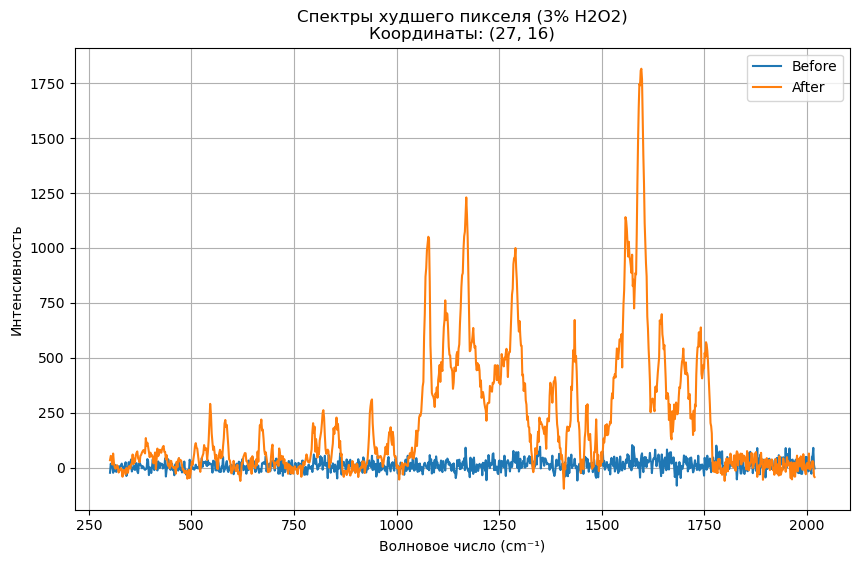

In [153]:
conc = '3'
if conc in data:
    before = data[conc]['before']
    after = data[conc]['after']
    wn = data[conc]['wn']
    
    before_sum = np.sum(before, axis=2)
    after_sum = np.sum(after, axis=2)
    
    # Находим самые проблемные пиксели
    ratio = after_sum / before_sum
    worst_pixel = np.unravel_index(np.nanargmax(ratio), ratio.shape)
    
    plt.figure(figsize=(10, 6))
    plt.plot(wn, before[worst_pixel], label='Before')
    plt.plot(wn, after[worst_pixel], label='After')
    plt.title(f'Спектры худшего пикселя ({conc}% H2O2)\nКоординаты: {worst_pixel}')
    plt.xlabel('Волновое число (cm⁻¹)')
    plt.ylabel('Интенсивность')
    plt.legend()
    plt.grid()
    plt.show()

In [154]:
def normalize_spectra(spectra):
    """Нормировка спектров по максимуму"""
    max_vals = np.max(spectra, axis=2, keepdims=True)
    return spectra / max_vals

for conc in data:
    data[conc]['before_norm'] = normalize_spectra(data[conc]['before'])
    data[conc]['after_norm'] = normalize_spectra(data[conc]['after'])

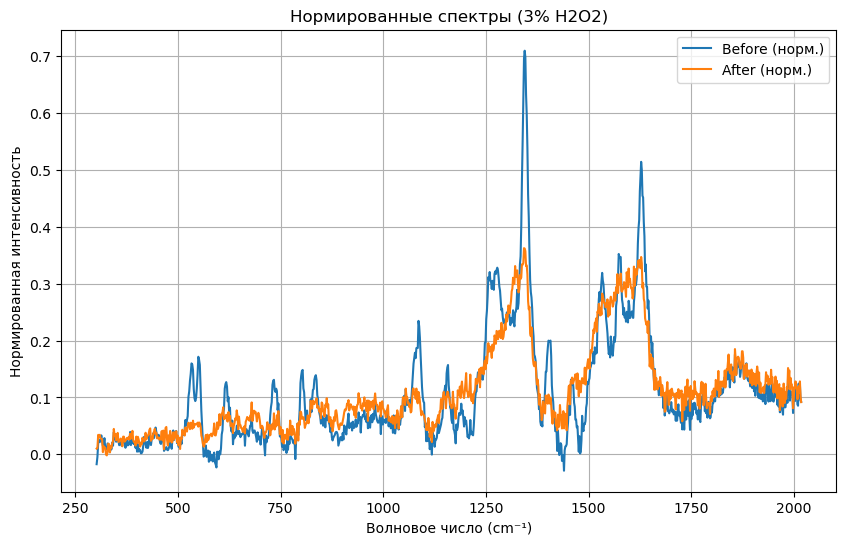

In [155]:
conc = '3'
if conc in data:
    before_norm = data[conc]['before_norm']
    after_norm = data[conc]['after_norm']
    
    # Усредненные спектры
    mean_before = np.mean(before_norm, axis=(0,1))
    mean_after = np.mean(after_norm, axis=(0,1))
    
    plt.figure(figsize=(10, 6))
    plt.plot(data[conc]['wn'], mean_before, label='Before (норм.)')
    plt.plot(data[conc]['wn'], mean_after, label='After (норм.)')
    plt.title(f'Нормированные спектры ({conc}% H2O2)')
    plt.xlabel('Волновое число (cm⁻¹)')
    plt.ylabel('Нормированная интенсивность')
    plt.legend()
    plt.grid()
    plt.show()

In [142]:
results = []
for conc, d in data.items():
    try:
        # Проверка размерностей
        if d['before'].shape != d['after'].shape:
            print(f"Пропущена концентрация {conc}% - несовпадение размерностей")
            continue
            
        # Расчет эффективности для каждого пикселя
        before_sum = np.sum(d['before'], axis=2)
        after_sum = np.sum(d['after'], axis=2)
        
        # Избегаем деления на ноль
        mask = before_sum > 0
        efficiency = np.zeros_like(before_sum)
        efficiency[mask] = 100 * (1 - after_sum[mask] / before_sum[mask])
        
        # Статистика
        mean_eff = np.nanmean(efficiency)
        std_eff = np.nanstd(efficiency)
        
        results.append({
            'concentration': float(conc),
            'mean_efficiency': mean_eff,
            'std_efficiency': std_eff,
            'pixels_analyzed': np.sum(mask)
        })
        
    except Exception as e:
        print(f"Ошибка при обработке {conc}%: {str(e)}")

# Результаты в DataFrame
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

   concentration  mean_efficiency  std_efficiency  pixels_analyzed
0            1.0        27.242441      178.477936              900
1            1.0       -28.407679      200.165024              900
2            1.0        50.869900       59.696152              900
3            2.0        -3.530982      228.164215              900
4            3.0       -13.943720      151.284821              900


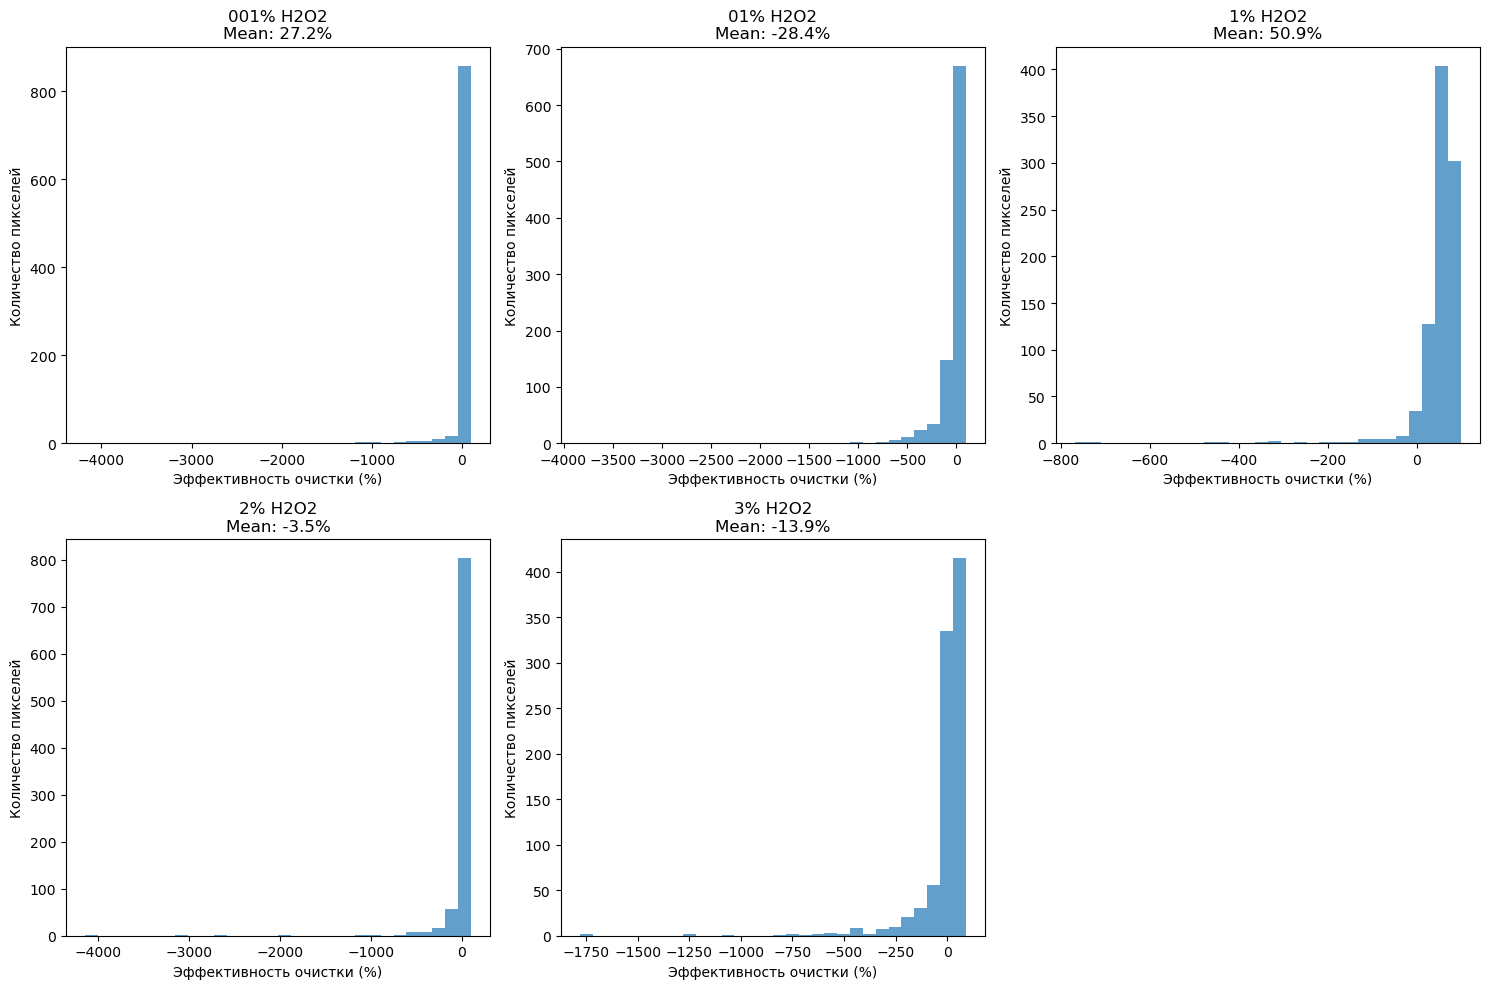

In [143]:
plt.figure(figsize=(15, 10))
for i, (conc, d) in enumerate(data.items(), 1):
    before_sum = np.sum(d['before'], axis=2)
    after_sum = np.sum(d['after'], axis=2)
    efficiency = 100 * (1 - after_sum / before_sum)
    
    plt.subplot(2, 3, i)
    plt.hist(efficiency.flatten(), bins=30, alpha=0.7)
    plt.title(f'{conc}% H2O2\nMean: {np.nanmean(efficiency):.1f}%')
    plt.xlabel('Эффективность очистки (%)')
    plt.ylabel('Количество пикселей')
plt.tight_layout()
plt.show()

In [144]:
conc = '3'  # Анализируем 3% перекись
if f'before_{conc}H2O2' in data and f'after_{conc}H2O2' in data:
    before = data[f'before_{conc}H2O2']
    after = data[f'after_{conc}H2O2']
    
    # 1. Карты эффективности
    before_sum = np.sum(before, axis=2)
    after_sum = np.sum(after, axis=2)
    efficiency = calculate_efficiency(before_sum, after_sum)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(before_sum, cmap='viridis')
    plt.title(f'Before {conc}% H2O2\nTotal intensity')
    plt.colorbar()
    
    plt.subplot(132)
    plt.imshow(after_sum, cmap='viridis')
    plt.title(f'After {conc}% H2O2\nTotal intensity')
    plt.colorbar()
    
    plt.subplot(133)
    im = plt.imshow(efficiency, cmap='coolwarm', vmin=0, vmax=100)
    plt.title(f'Cleaning efficiency\nMean: {np.nanmean(efficiency):.1f}%')
    plt.colorbar(im, label='Efficiency (%)')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Гистограмма эффективности
    plt.figure(figsize=(10, 6))
    plt.hist(efficiency.flatten(), bins=30, range=(0, 100), alpha=0.7)
    plt.xlabel('Эффективность очистки (%)')
    plt.ylabel('Количество пикселей')
    plt.title(f'Распределение эффективности очистки ({conc}% H2O2)')
    plt.grid(True)
    plt.show()

In [145]:
if '3' in data:
    before = data['before_3H2O2']
    after = data['after_3H2O2']
    
    # 1. Проверка качества данных
    print(f"\nКачество данных для 3% H2O2:")
    print(f"Средняя интенсивность before: {np.mean(before):.2f}")
    print(f"Средняя интенсивность after: {np.mean(after):.2f}")
    print(f"Медианное отношение after/before: {np.median(after/before):.2f}")
    
    # 2. Поиск артефактов
    diff = before - after
    artifact_pixels = np.where(diff < 0)  # Пиксели, где интенсивность УВЕЛИЧИЛАСЬ
    print(f"\nПроблемные пиксели (увеличение интенсивности): {len(artifact_pixels[0])}")
    
    # 3. Визуализация проблемных пикселей
    plt.figure(figsize=(10, 6))
    plt.scatter(artifact_pixels[1], artifact_pixels[0], c='red', s=10)
    plt.imshow(np.sum(before, axis=2), cmap='gray')
    plt.title('Проблемные пиксели (красные точки)')
    plt.colorbar(label='Интенсивность before')
    plt.show()

KeyError: 'before_3H2O2'

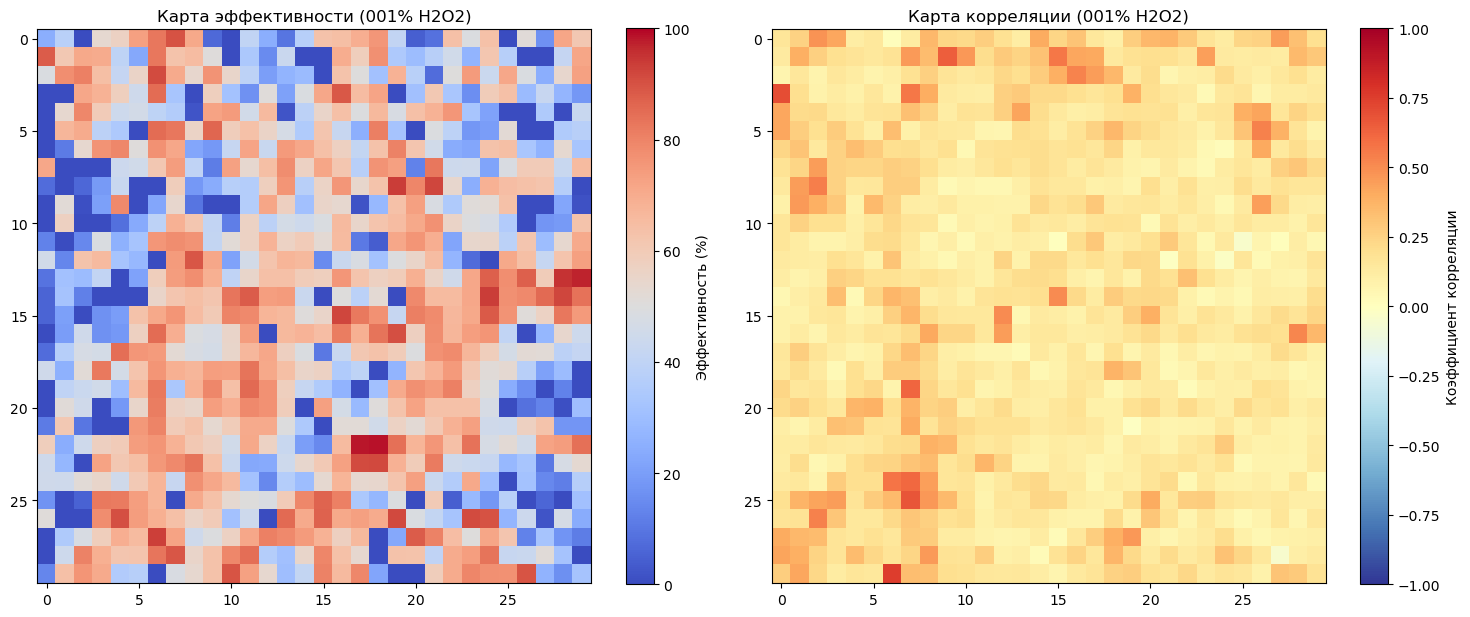

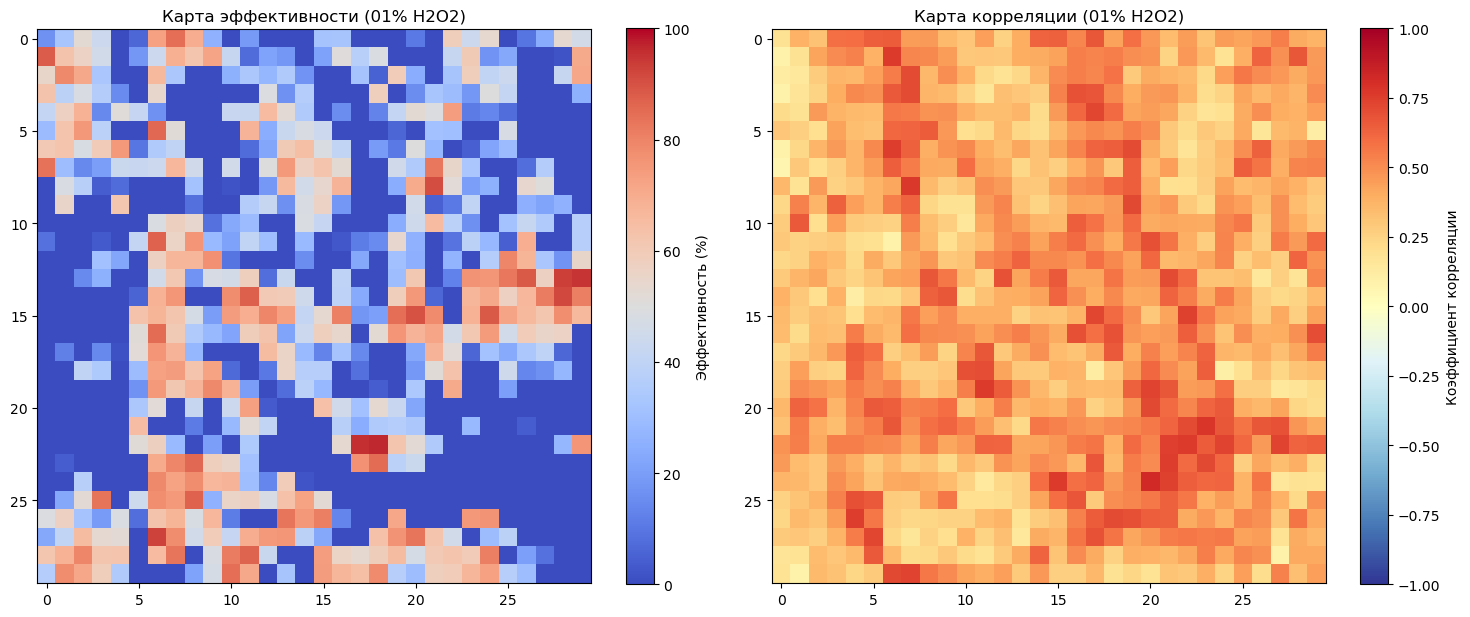

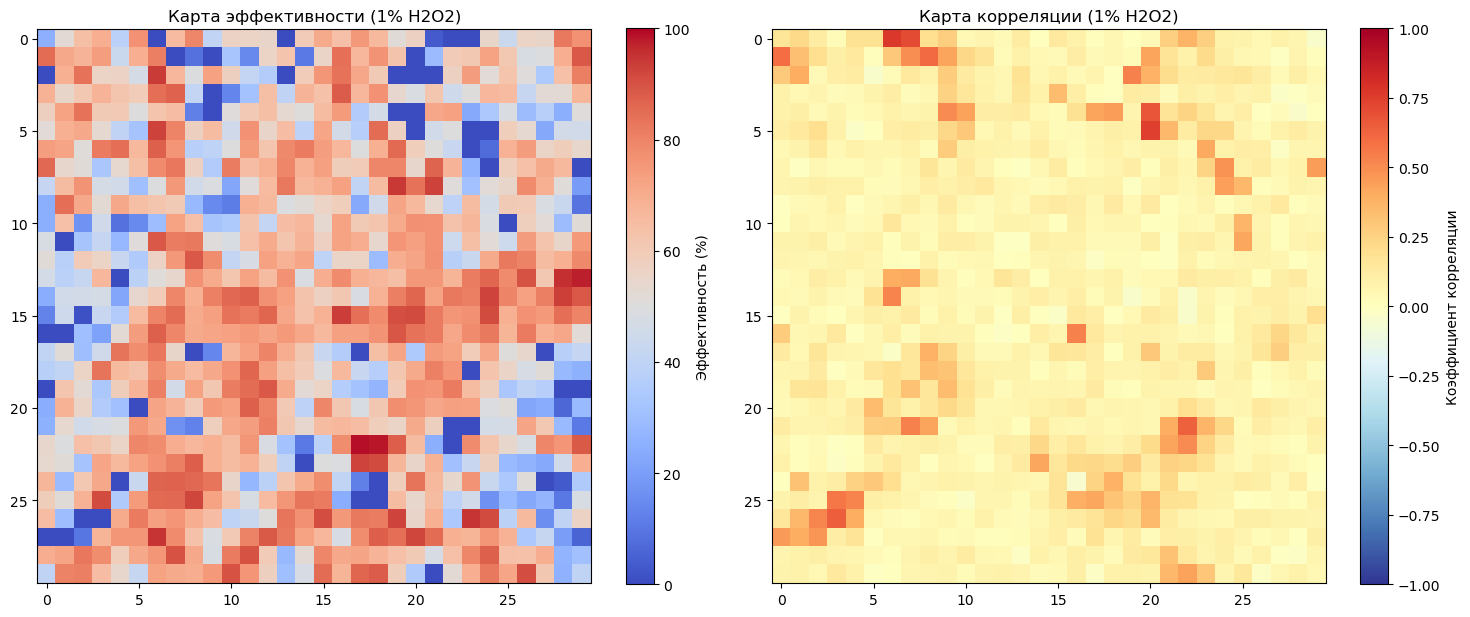

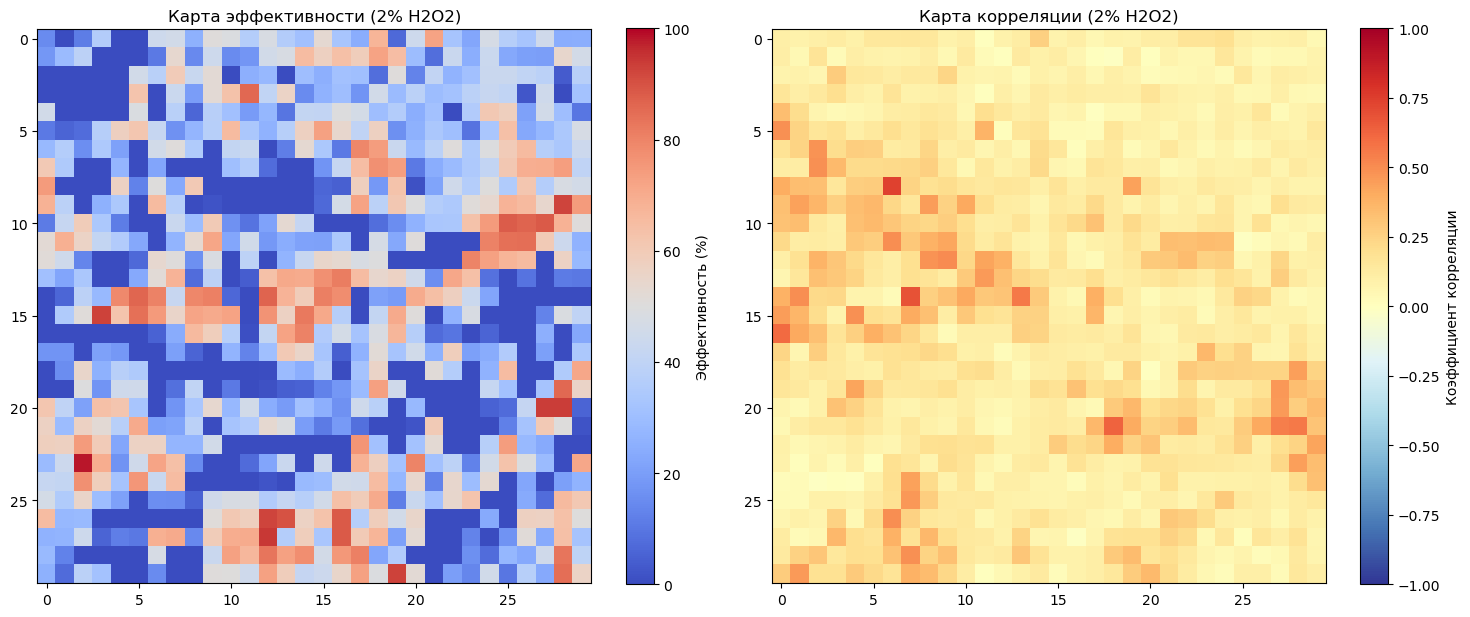

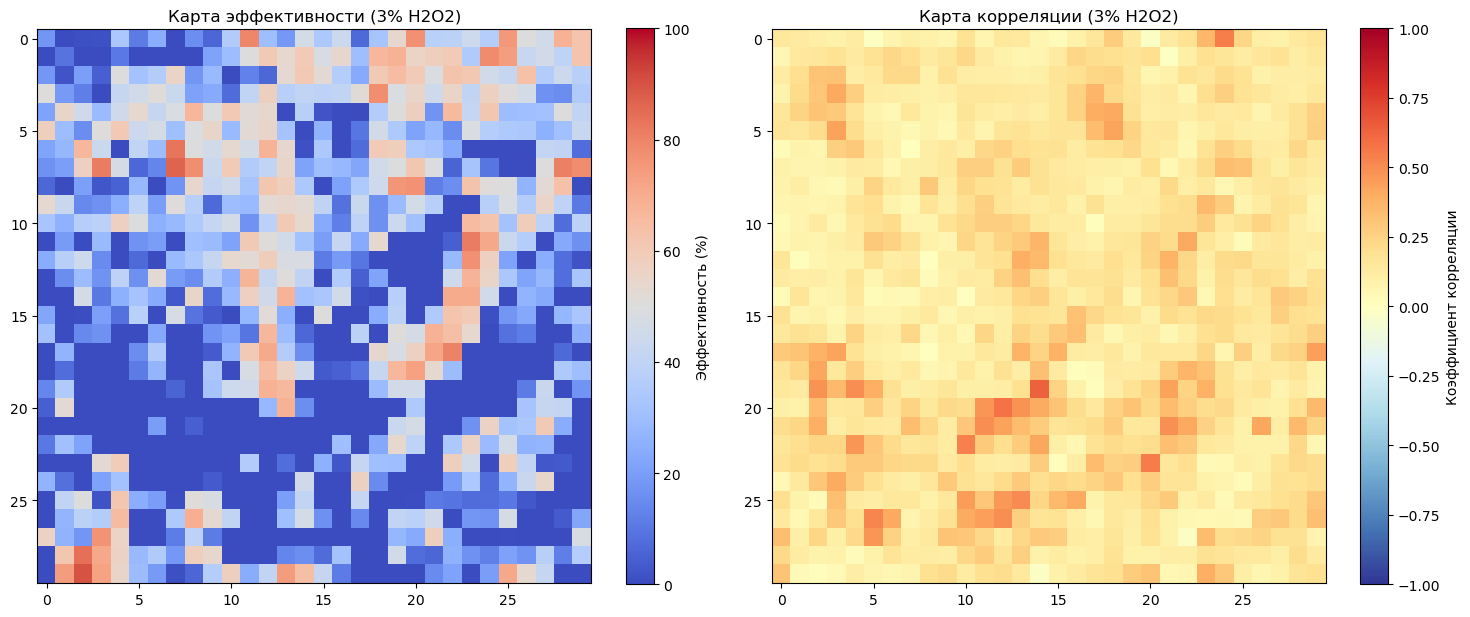

In [129]:
for conc, d in data.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Карта эффективности
    before_sum = np.sum(d['before'], axis=2)
    after_sum = np.sum(d['after'], axis=2)
    efficiency = 100 * (1 - after_sum / before_sum)
    
    im1 = ax1.imshow(efficiency, cmap='coolwarm', vmin=0, vmax=100)
    plt.colorbar(im1, ax=ax1, label='Эффективность (%)')
    ax1.set_title(f'Карта эффективности ({conc}% H2O2)')
    
    # Карта корреляции
    corr_map = np.zeros((30, 30))
    for i in range(30):
        for j in range(30):
            corr_map[i,j] = pearsonr(d['before'][i,j,:], d['after'][i,j,:])[0]
    
    im2 = ax2.imshow(corr_map, cmap='RdYlBu_r', vmin=-1, vmax=1)
    plt.colorbar(im2, ax=ax2, label='Коэффициент корреляции')
    ax2.set_title(f'Карта корреляции ({conc}% H2O2)')
    
    plt.tight_layout()
    plt.show()

In [130]:
# Определите интересующие спектральные диапазоны (пример для Raman)
peak_ranges = {
    'D-band': [1300, 1400],
    'G-band': [1580, 1620],
    '2D-band': [2600, 2700]
}

for conc, d in data.items():
    print(f"\nАнализ пиков для {conc}% H2O2:")
    for peak_name, (start, end) in peak_ranges.items():
        idx = (d['wn'] >= start) & (d['wn'] <= end)
        before_peak = np.mean(d['before'][:,:,idx], axis=2)
        after_peak = np.mean(d['after'][:,:,idx], axis=2)
        
        eff = 100 * (1 - np.mean(after_peak) / np.mean(before_peak))
        print(f"{peak_name}: эффективность очистки {eff:.1f}%")


Анализ пиков для 001% H2O2:
D-band: эффективность очистки 62.3%
G-band: эффективность очистки 64.9%
2D-band: эффективность очистки nan%

Анализ пиков для 01% H2O2:
D-band: эффективность очистки 19.3%
G-band: эффективность очистки 18.4%
2D-band: эффективность очистки nan%

Анализ пиков для 1% H2O2:
D-band: эффективность очистки 75.1%
G-band: эффективность очистки 79.7%
2D-band: эффективность очистки nan%

Анализ пиков для 2% H2O2:
D-band: эффективность очистки 15.5%
G-band: эффективность очистки 10.9%
2D-band: эффективность очистки nan%

Анализ пиков для 3% H2O2:
D-band: эффективность очистки 23.7%
G-band: эффективность очистки -47.5%
2D-band: эффективность очистки nan%


C:\Users\artem\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\artem\anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


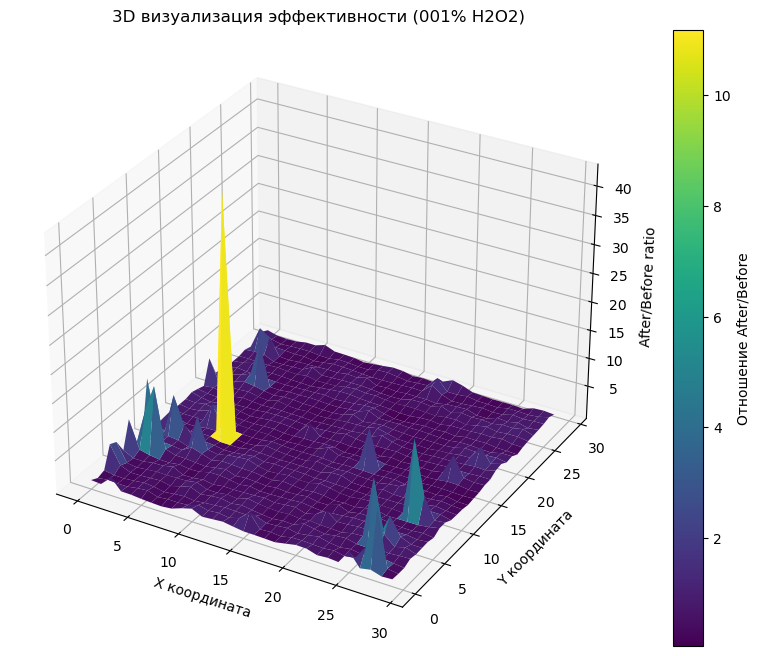

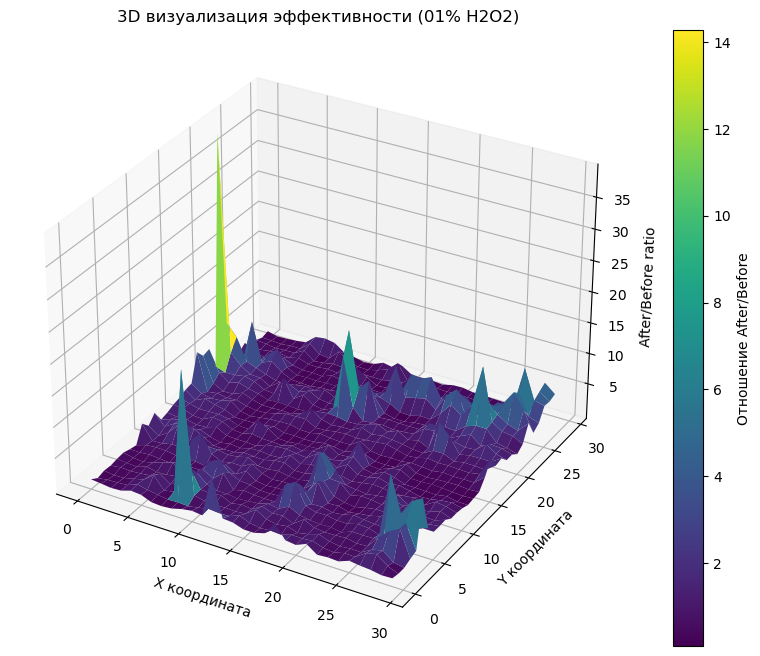

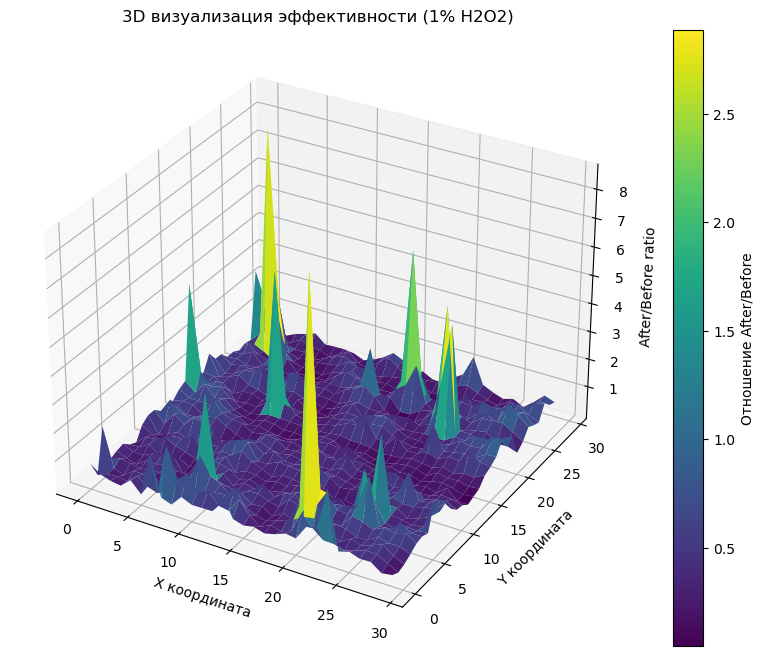

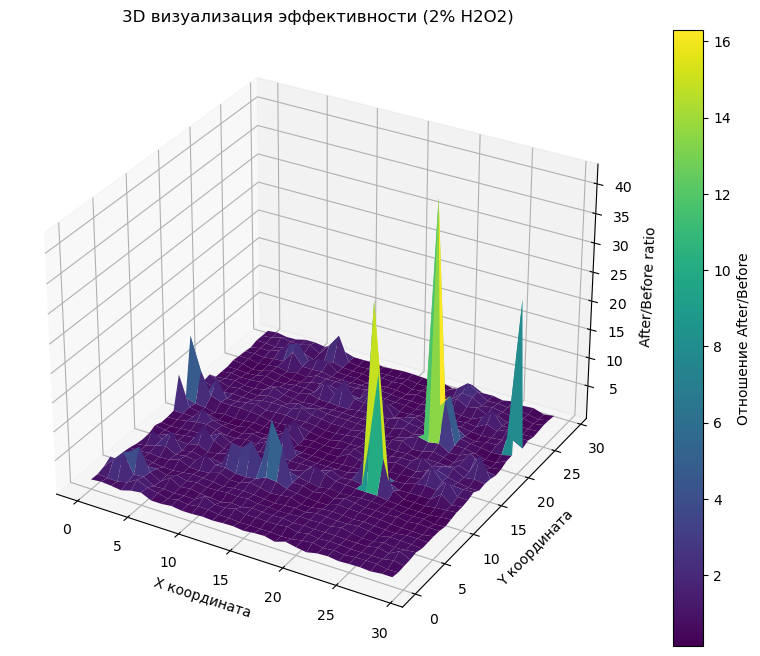

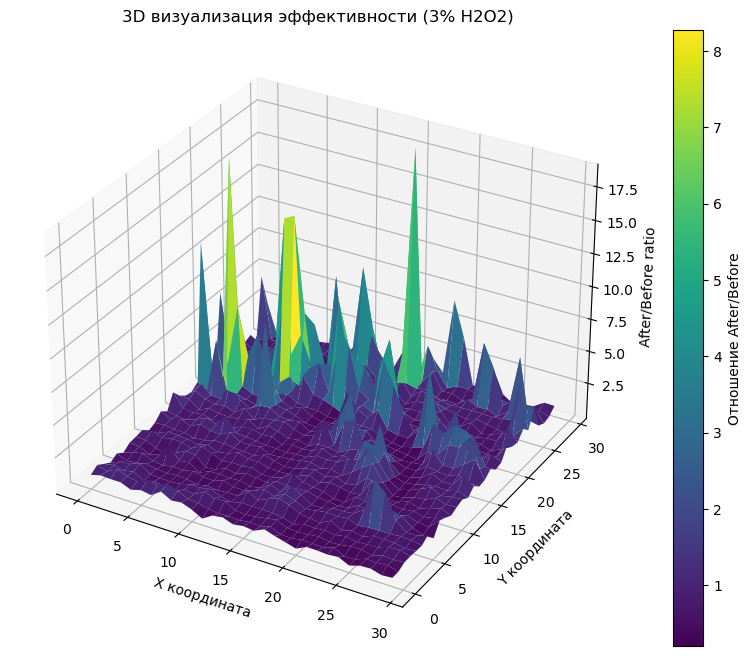

In [131]:
from mpl_toolkits.mplot3d import Axes3D

for conc, d in data.items():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Подготовка данных
    X, Y = np.meshgrid(np.arange(30), np.arange(30))
    Z = np.sum(d['after'], axis=2) / np.sum(d['before'], axis=2)
    
    # Поверхность
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    fig.colorbar(surf, label='Отношение After/Before')
    
    ax.set_title(f'3D визуализация эффективности ({conc}% H2O2)')
    ax.set_xlabel('X координата')
    ax.set_ylabel('Y координата')
    ax.set_zlabel('After/Before ratio')
    plt.show()

In [132]:
import pandas as pd
from scipy import stats

results = []
for conc, d in data.items():
    # Расчет по всем пикселям
    before_flat = d['before'].reshape(-1, d['wn'].shape[0])
    after_flat = d['after'].reshape(-1, d['wn'].shape[0])
    
    # Статистические тесты
    t_test = stats.ttest_rel(np.sum(before_flat, axis=1), np.sum(after_flat, axis=1))
    
    results.append({
        'Концентрация (%)': float(conc),
        'Средняя эффективность (%)': np.nanmean(100 * (1 - np.sum(after_flat, axis=1) / np.sum(before_flat, axis=1))),
        'p-value': t_test.pvalue,
        'Значимость': t_test.pvalue < 0.05
    })

# Сохранение в Excel
df_results = pd.DataFrame(results)
df_results.to_excel('результаты_очистки.xlsx', index=False)
print(df_results)

   Концентрация (%)  Средняя эффективность (%)       p-value  Значимость
0               1.0                  27.242441  5.049964e-15        True
1               1.0                 -28.407679  3.622546e-02        True
2               1.0                  50.869900  3.778100e-51        True
3               2.0                  -3.530982  5.635434e-03        True
4               3.0                 -13.943720  9.708948e-01       False


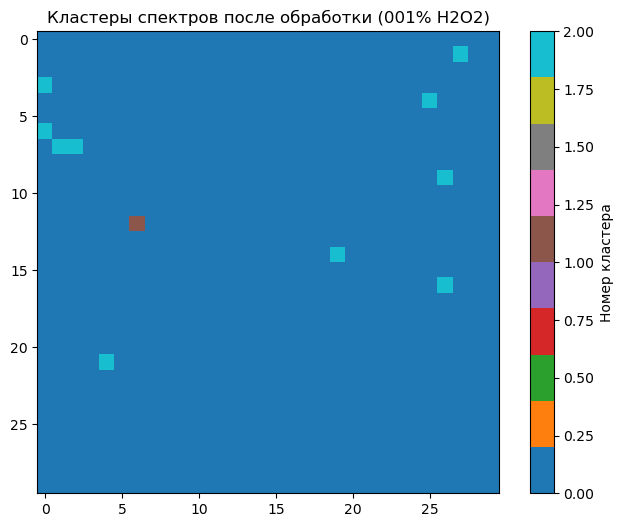

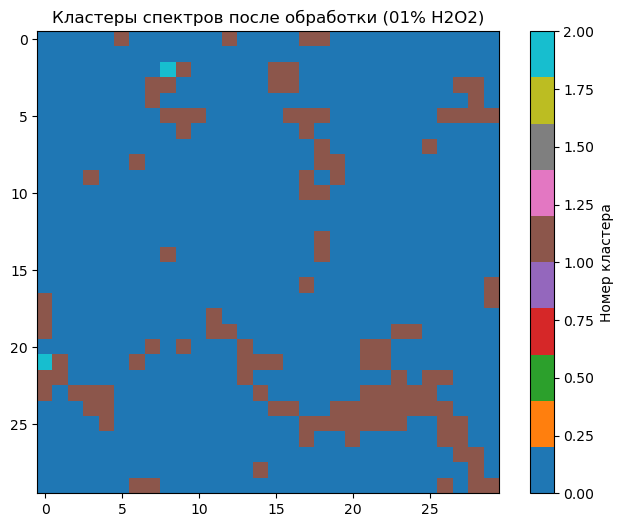

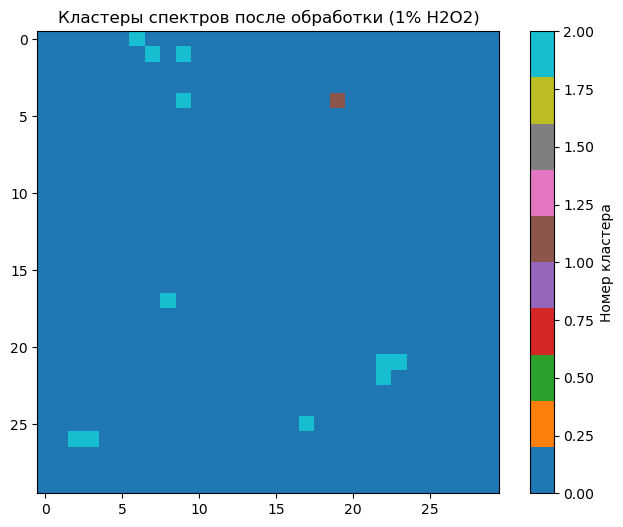

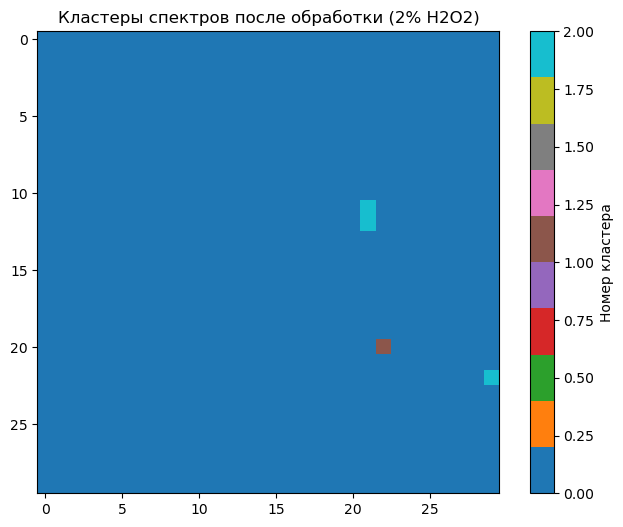

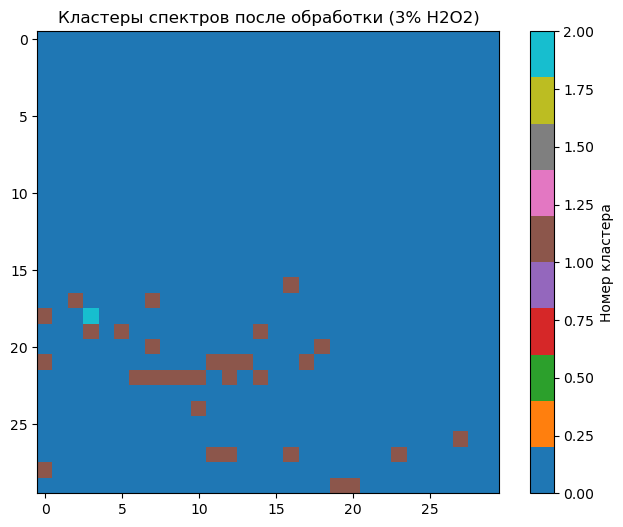

In [133]:
from sklearn.cluster import KMeans

for conc, d in data.items():
    # Подготовка данных (все спектры после обработки)
    X = d['after'].reshape(-1, d['wn'].shape[0])
    
    # Кластеризация
    kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
    clusters = kmeans.labels_.reshape(30, 30)
    
    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.imshow(clusters, cmap='tab10')
    plt.title(f'Кластеры спектров после обработки ({conc}% H2O2)')
    plt.colorbar(label='Номер кластера')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


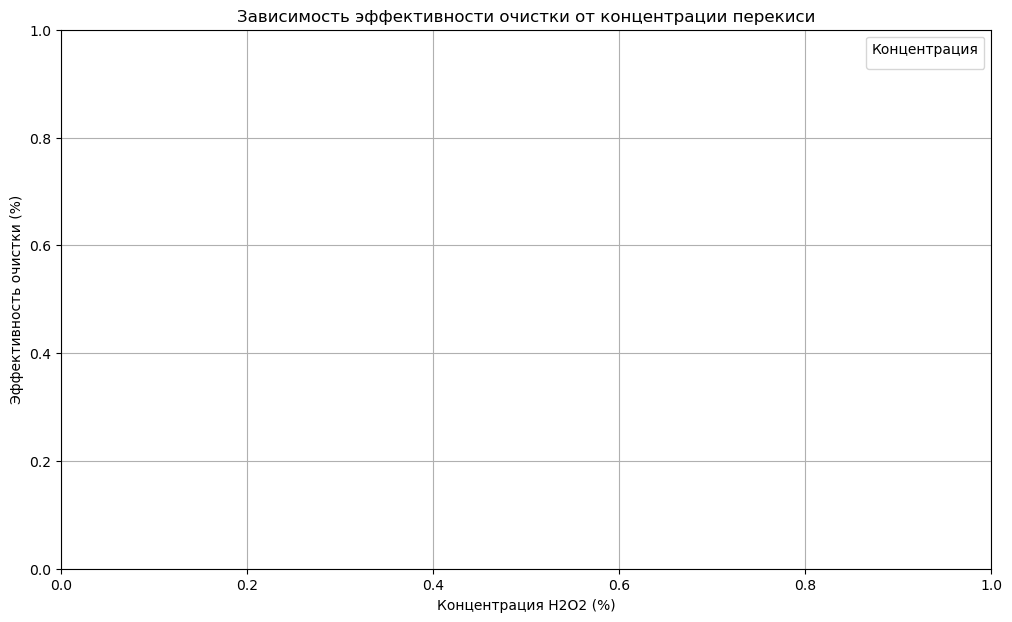

In [135]:
plt.figure(figsize=(12, 7))
for conc in df_efficiency.index:
    eff_data = results[conc]
    plt.errorbar(
        x=float(conc),
        y=eff_data['mean_efficiency'],
        yerr=eff_data['std_efficiency'],
        fmt='o-',
        markersize=10,
        capsize=5,
        label=f'{conc}%'
    )

plt.xlabel('Концентрация H2O2 (%)')
plt.ylabel('Эффективность очистки (%)')
plt.title('Зависимость эффективности очистки от концентрации перекиси')
plt.legend(title='Концентрация')
plt.grid(True)
plt.show()